# Introduction

Electrocardiogram (ECG) signals are crucial for monitoring heart activity and diagnosing various cardiac conditions. The primary objective of this project is to classify ECG signals into two categories: normal heartbeats and abnormal heartbeats (Myocardial Infarction).

ECG signals are time series data that represent the electrical activity of the heart over time. This project involves applying time series classification techniques to accurately distinguish between normal and abnormal heartbeats.

## Objectives

The main objectives of this project are:
- To preprocess and prepare ECG time series data for classification.
- To explore and apply different machine learning algorithms for classifying ECG signals.
- To handle class imbalance using techniques like Synthetic Minority Over-sampling Technique (SMOTE).
- To transform the time series data into different representations such as Continuous Wavelet Transform (CWT) and Gramian Angular Field (GAF) for enhanced feature extraction.
- To evaluate the performance of the classification models using appropriate metrics.

## Data Set

The dataset consists of ECG recordings, each containing 96 data points representing a single heartbeat. Each sample is labeled as either normal or abnormal. Normal heartbeats are labeled as `1` and abnormal heartbeats (Myocardial Infarction) are labeled as `-1`.

## Approach

1. **Data Preprocessing**:
   - Load the ECG data and separate the features and labels.
   - Standardize the labels by converting `-1` to `0`.

2. **Handling Class Imbalance**:
   - Apply SMOTE to balance the class distribution in the training data.

3. **Feature Extraction**:
   - Apply Continuous Wavelet Transform (CWT) to capture both time and frequency information.
   - Transform the time series data into Gramian Angular Field (GAF) images to capture temporal correlations.

4. **Model Training and Evaluation**:
   - Train various machine learning models on the transformed data.
   - Evaluate the models using cross-validation and other relevant metrics to ensure robustness and accuracy.

By implementing these steps, we aim to develop a robust and accurate classification model for ECG signals, capable of distinguishing between normal and abnormal heartbeats effectively.


## **Data description:**
The dataset consists of 100 ECG recordings, each 96 data points long. Each sample has a class label:

-1: Myocardial Infarction (heart attack).
+1: Normal Heartbeat.

This dataset is used to train models for classifying heartbeats as normal or indicative of a myocardial infarction.

## **Loading data:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load and read the data
def load_data(file_path):
    data = pd.read_csv(file_path, delim_whitespace=True, header=None)
    return data

# Specify the file path
file_path = 'ECG200_TRAIN.txt'

# Load the data
data = load_data(file_path)

In [ ]:
# Check the shape of the data
print(f"Data shape: {data.shape}")

Data shape: (100, 97)


In [ ]:
# Display the first few rows of the DataFrame
print(data.head())

    0         1         2         3         4         5         6         7   \
0 -1.0  0.502055  0.542163  0.722383  1.428885  2.136516  2.281149  1.936274   
1  1.0  0.147647  0.804668  0.367771  0.243894  0.026614 -0.274402  0.096731   
2 -1.0  0.316646  0.243199  0.370471  1.063738  1.678187  1.759558  1.697717   
3 -1.0  1.168874  2.075901  1.760141  1.606446  1.949046  1.302842  0.459332   
4  1.0  0.648658  0.752026  2.636231  3.455716  2.118157  0.520620 -0.188627   

         8         9   ...        87        88        89        90        91  \
0  1.468890  1.008845  ...  0.931043  0.610298  0.638894  0.684679  0.583238   
1 -0.747731 -1.609777  ... -0.533503 -0.400228  0.176084  1.111768  2.438428   
2  1.612159  1.168188  ...  0.764229  0.610621  0.552900  0.566786  0.604002   
3  0.516412  0.852180  ...  0.419006  0.723888  1.323947  2.136488  1.746597   
4  0.780818  0.933775  ... -0.097869 -0.136787 -0.340237 -0.089441 -0.080297   

         92        93        94       

In [ ]:

# Split the data into labels and features
labels = data.iloc[:, 0]
features = data.iloc[:, 1:]

In [ ]:
# Verify the data
print(labels.head())
print(features.head())

0   -1.0
1    1.0
2   -1.0
3   -1.0
4    1.0
Name: 0, dtype: float64
         1         2         3         4         5         6         7   \
0  0.502055  0.542163  0.722383  1.428885  2.136516  2.281149  1.936274   
1  0.147647  0.804668  0.367771  0.243894  0.026614 -0.274402  0.096731   
2  0.316646  0.243199  0.370471  1.063738  1.678187  1.759558  1.697717   
3  1.168874  2.075901  1.760141  1.606446  1.949046  1.302842  0.459332   
4  0.648658  0.752026  2.636231  3.455716  2.118157  0.520620 -0.188627   

         8         9         10  ...        87        88        89        90  \
0  1.468890  1.008845  0.380282  ...  0.931043  0.610298  0.638894  0.684679   
1 -0.747731 -1.609777 -1.179593  ... -0.533503 -0.400228  0.176084  1.111768   
2  1.612159  1.168188  0.499957  ...  0.764229  0.610621  0.552900  0.566786   
3  0.516412  0.852180  0.989227  ...  0.419006  0.723888  1.323947  2.136488   
4  0.780818  0.933775  0.701402  ... -0.097869 -0.136787 -0.340237 -0.089441   


### **Exploratory Data Analysis:**

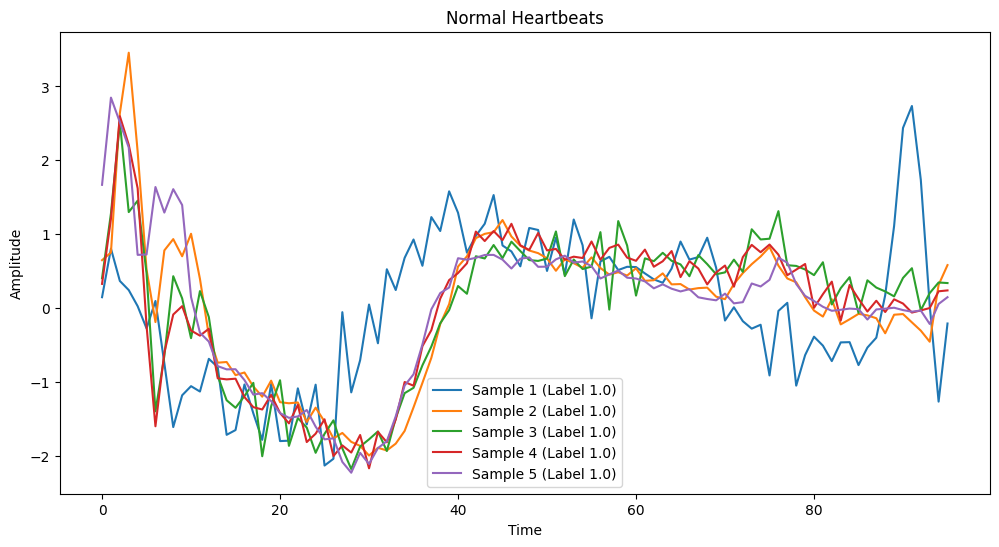

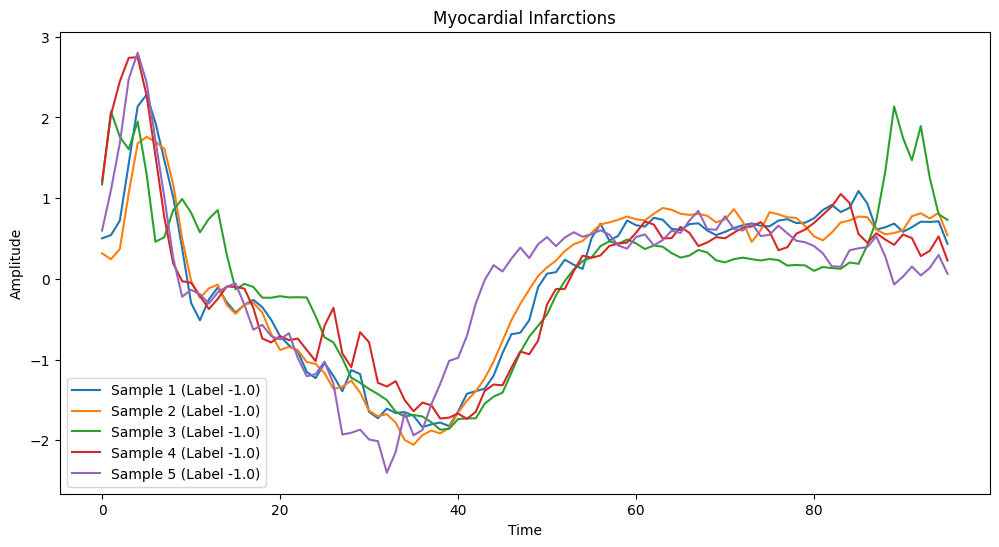

In [ ]:
import matplotlib.pyplot as plt

# Function to plot ECG signals
def plot_ecg(signals, labels, title):
    plt.figure(figsize=(12, 6))
    for i, signal in enumerate(signals):
        plt.plot(signal, label=f'Sample {i+1} (Label {labels[i]})')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Plot a few examples of normal heartbeats (+1)
normal_samples = features[labels == 1].head(5).values
plot_ecg(normal_samples, labels[labels == 1].head(5).values, 'Normal Heartbeats')

# Plot a few examples of myocardial infarctions (-1)
mi_samples = features[labels == -1].head(5).values
plot_ecg(mi_samples, labels[labels == -1].head(5).values, 'Myocardial Infarctions')


### **Splitting Data:**

In [ ]:
# Splitting the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

### **Data Normalization:**

In [ ]:

# Standardize the features using z-score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


## **Logistic Regression Model:**

In [ ]:
# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on the train and val data
y_train_pred = lr_model.predict(X_train_scaled)
y_val_pred = lr_model.predict(X_val_scaled)



### **Hyperparameter Tuning:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100,200],
    'solver': [ 'saga'],
    'max_iter': [1000]
}

# Initialize variables to store the best parameters and the best score
best_params = None
best_val_accuracy = 0
best_lr_model = None

# Iterate over the parameter grid
for penalty in param_grid['penalty']:
    for C in param_grid['C']:
        for solver in param_grid['solver']:
            for max_iter in param_grid['max_iter']:
                # Create a logistic regression model with the current set of parameters
                lr_model = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=max_iter)

                try:
                    # Train the model on the training data
                    lr_model.fit(X_train_scaled, y_train)

                    # Predict on the validation data
                    y_val_pred = lr_model.predict(X_val_scaled)

                    # Calculate validation accuracy
                    val_accuracy = accuracy_score(y_val, y_val_pred)

                    # Update the best parameters if the current model is better
                    if val_accuracy > best_val_accuracy:
                        best_val_accuracy = val_accuracy
                        best_params = {'penalty': penalty, 'C': C, 'solver': solver, 'max_iter': max_iter}
                        best_lr_model = lr_model

                except Exception as e:
                    # Handle cases where certain parameter combinations are incompatible
                    print(f"Skipping combination penalty={penalty}, C={C}, solver={solver}, max_iter={max_iter} due to error: {e}")

# Print the best parameters and the best validation accuracy
print("Best parameters found: ", best_params)
print("Best validation accuracy: {:.2f}".format(best_val_accuracy))

# Predict on the train and val data using the best model
y_train_pred = best_lr_model.predict(X_train_scaled)
y_val_pred = best_lr_model.predict(X_val_scaled)

# Calculate and print training and validation accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training accuracy: {:.2f}".format(train_accuracy))
print("Validation accuracy: {:.2f}".format(val_accuracy))


Best parameters found:  {'penalty': 'l1', 'C': 10, 'solver': 'saga', 'max_iter': 1000}
Best validation accuracy: 0.95
Training accuracy: 1.00
Validation accuracy: 0.95


## **ANN Model:**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(80,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.00001],
    'learning_rate': [ 'adaptive'],
    'max_iter': [400]
}

# Create the MLPClassifier
ann_model = MLPClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ann_model, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_ann_model = grid_search.best_estimator_

# Predict on the training and validation data using the best model
y_train_pred_ann = best_ann_model.predict(X_train_scaled)
y_val_pred_ann = best_ann_model.predict(X_val_scaled)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred_ann)
val_accuracy = accuracy_score(y_val, y_val_pred_ann)

# Print the results
print("Best Parameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred_ann))


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best Parameters: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (80,), 'learning_rate': 'adaptive', 'max_iter': 400, 'solver': 'adam'}
Training Accuracy: 1.0
Validation Accuracy: 0.9
Classification Report (Validation):
               precision    recall  f1-score   support

        -1.0       1.00      0.67      0.80         6
         1.0       0.88      1.00      0.93        14

    accuracy                           0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20



## **Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest classifier
random_forrest_model = RandomForestClassifier(n_estimators=200, random_state=42)
random_forrest_model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Predict on the training and validation data using the best model
y_train_pred_rf = random_forrest_model.predict(X_train_scaled)
y_val_pred_rf = random_forrest_model.predict(X_val_scaled)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print("random forest:")
print(f"Train Accuracy: {train_accuracy_rf}")
print(f"val Accuracy: {val_accuracy_rf}")

random forest:
Train Accuracy: 1.0
val Accuracy: 0.8


## **CNN Model:**

In [ ]:
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv('ECG200_TRAIN.txt', delim_whitespace=True, header=None)

# Separate the labels and the features
labels = data.iloc[:, 0]
features = data.iloc[:, 1:]

# Update the labels: replace -1 with 0
labels = labels.replace(-1, 0)
# Display the first few rows of the dataset
data.head()


,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-1.0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,1.0,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,-1.0,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,-1.0,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,1.0,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190


## **Applying SMOTE:**

To address the issue of data imblancing, we use SMOTE (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic samples for the minority class by interpolating between existing minority class samples. This technique helps to balance the dataset, ensuring that the model receives equal representation from both classes during training.

0
0.0    69
1.0    69
Name: count, dtype: int64


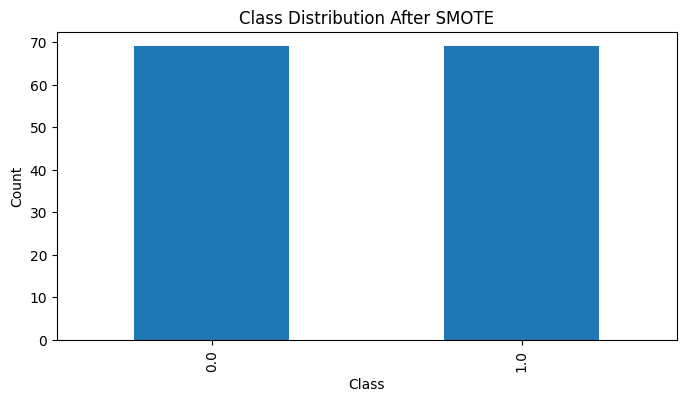

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Apply SMOTE to balance the classes
smote = SMOTE()
features_resampled, labels_resampled = smote.fit_resample(features, labels)

# Check the new class distribution
class_counts_resampled = pd.Series(labels_resampled).value_counts()
print(class_counts_resampled)

# Plot the new class distribution
plt.figure(figsize=(8, 4))
class_counts_resampled.plot(kind='bar')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### **Resampling Data Visualization:**

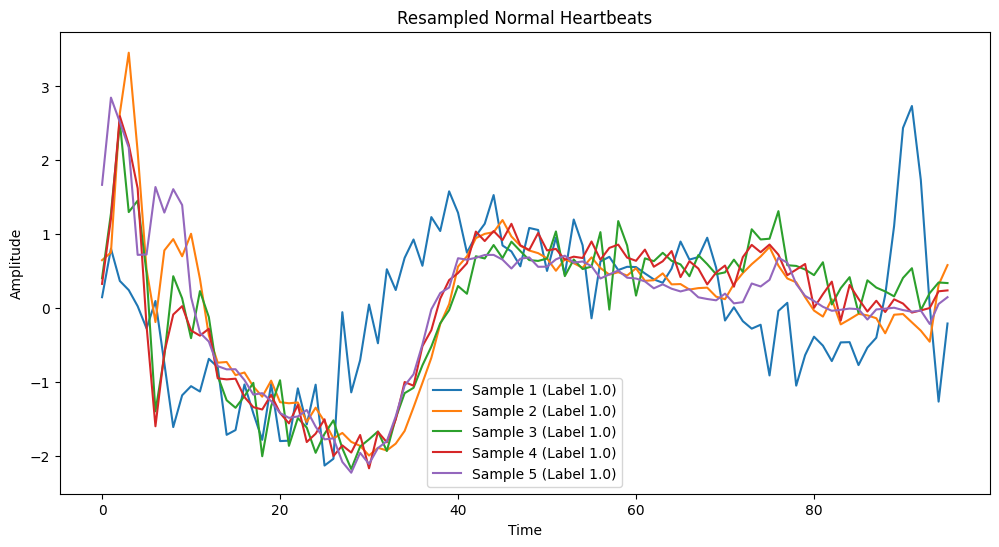

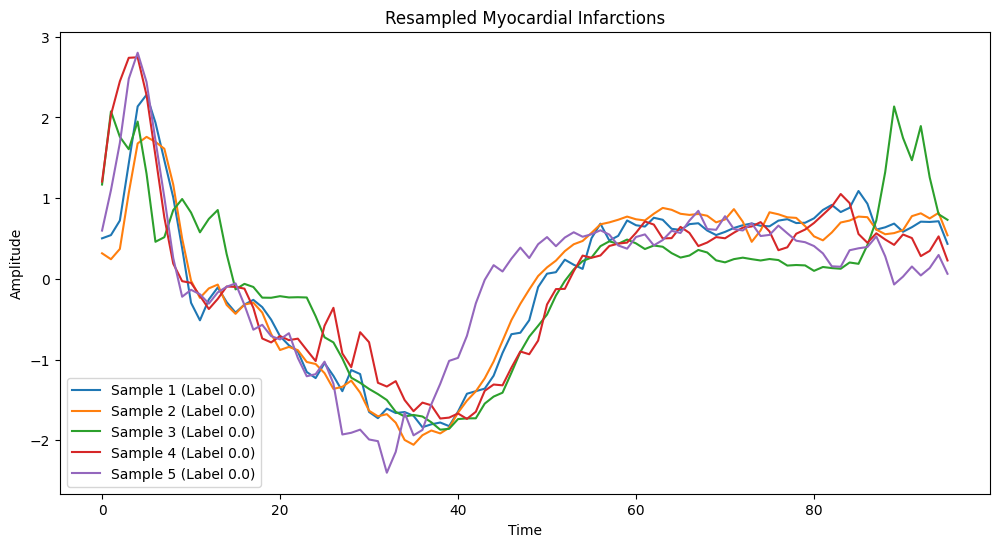

In [ ]:
# Function to plot resampled ECG signals
def plot_resampled_ecg(signals, labels, title):
    plt.figure(figsize=(12, 6))
    for i, signal in enumerate(signals):
        plt.plot(signal, label=f'Sample {i+1} (Label {labels.iloc[i]})')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Convert resampled features and labels back to DataFrame for easy indexing
features_resampled_df = pd.DataFrame(features_resampled)
labels_resampled_df = pd.Series(labels_resampled)

# Plot a few examples of resampled normal heartbeats (+1)
normal_samples_resampled = features_resampled_df[labels_resampled_df == 1].head(5)
plot_resampled_ecg(normal_samples_resampled.values, labels_resampled_df[labels_resampled_df == 1].head(5), 'Resampled Normal Heartbeats')

# Plot a few examples of resampled myocardial infarctions (-1)
mi_samples_resampled = features_resampled_df[labels_resampled_df == 0].head(5)
plot_resampled_ecg(mi_samples_resampled.values, labels_resampled_df[labels_resampled_df == 0].head(5), 'Resampled Myocardial Infarctions')


### **Normalizing data:**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
features_normalized = scaler.fit_transform(features_resampled)

# Convert the normalized features back to DataFrame for easy handling
features_normalized_df = pd.DataFrame(features_normalized)

# Check the first few rows of the normalized data
features_normalized_df.head()


,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.355890,0.354393,0.395211,0.474878,0.681135,0.834702,0.872210,0.798455,0.701627,0.563193,...,0.766676,0.594758,0.591506,0.455418,0.316767,0.308209,0.355425,0.462351,0.679145,0.640460
1,0.251508,0.411019,0.326645,0.250254,0.256507,0.267916,0.418327,0.203930,0.000000,0.119665,...,0.000000,0.133052,0.354597,0.609911,0.831171,0.859242,0.607870,0.278009,0.157450,0.394679
2,0.301282,0.289902,0.327167,0.405662,0.588894,0.719020,0.813349,0.836882,0.744321,0.597220,...,0.679350,0.594905,0.547486,0.412772,0.322525,0.344134,0.380918,0.474445,0.706622,0.680894
3,0.552283,0.685243,0.595866,0.508536,0.643406,0.617727,0.507794,0.542989,0.659651,0.736337,...,0.498630,0.646656,0.942180,0.980588,0.639341,0.526504,0.646557,0.614629,0.701973,0.754496
4,0.399067,0.399663,0.765262,0.859078,0.677440,0.444241,0.347919,0.613906,0.681513,0.654498,...,0.228051,0.253417,0.090295,0.175392,0.132783,0.089016,0.106464,0.142429,0.573897,0.697301


### **Visualize the Normalized Data:**

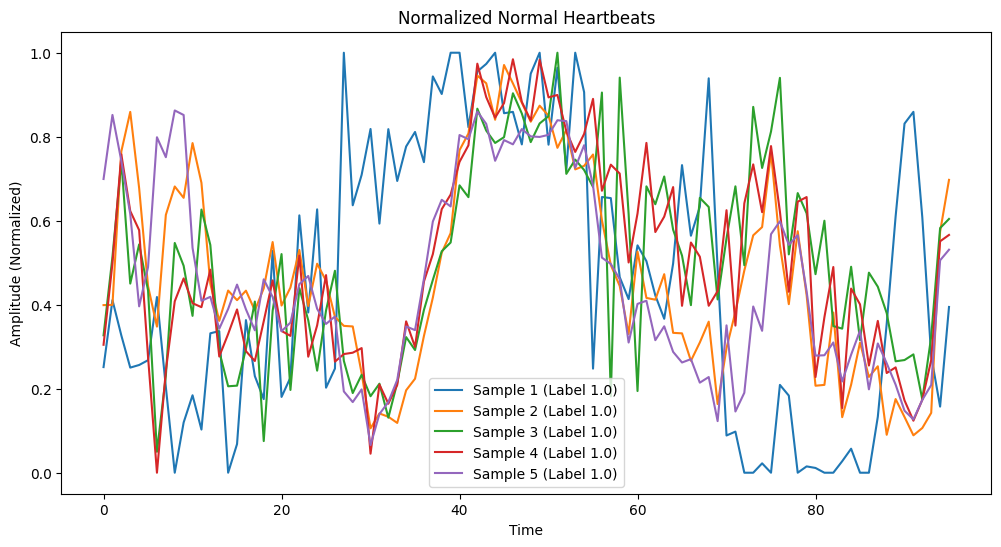

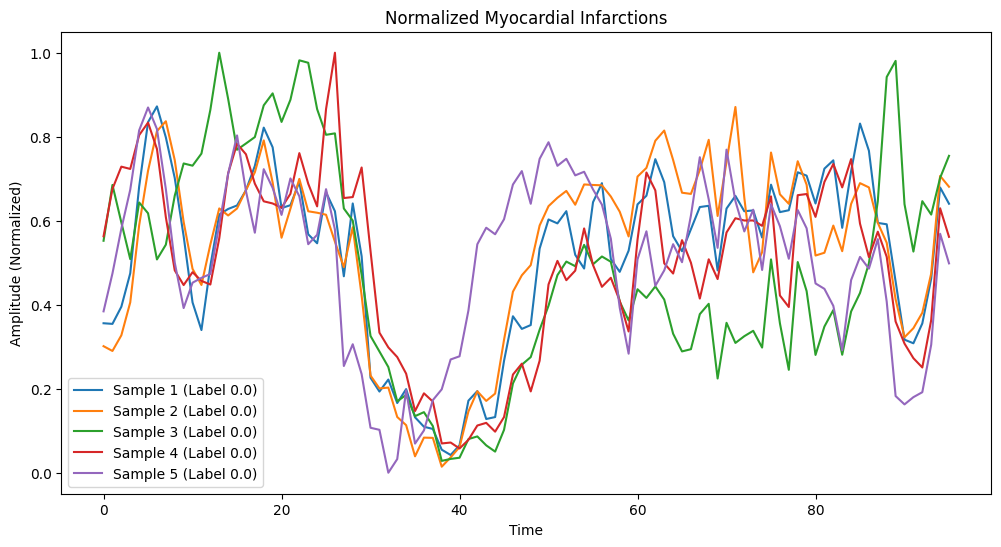

In [ ]:
# Function to plot normalized ECG signals
def plot_normalized_ecg(signals, labels, title):
    plt.figure(figsize=(12, 6))
    for i, signal in enumerate(signals):
        plt.plot(signal, label=f'Sample {i+1} (Label {labels.iloc[i]})')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude (Normalized)')
    plt.legend()
    plt.show()

# Plot a few examples of normalized normal heartbeats (+1)
normal_samples_normalized = features_normalized_df[labels_resampled_df == 1].head(5)
plot_normalized_ecg(normal_samples_normalized.values, labels_resampled_df[labels_resampled_df == 1].head(5), 'Normalized Normal Heartbeats')

# Plot a few examples of normalized myocardial infarctions (-1)
mi_samples_normalized = features_normalized_df[labels_resampled_df == 0].head(5)
plot_normalized_ecg(mi_samples_normalized.values, labels_resampled_df[labels_resampled_df == 0].head(5), 'Normalized Myocardial Infarctions')


### **Continuous Wavelet Transform (CWT)**
Here we used Countinuous Wavelet Tranform which is a type of wavelet transform where the wavelets are scaled and shifted continuously. It provides a detailed view of the signal at different scales and positions. This continuous approach allows for a comprehensive analysis of the signal's local features.

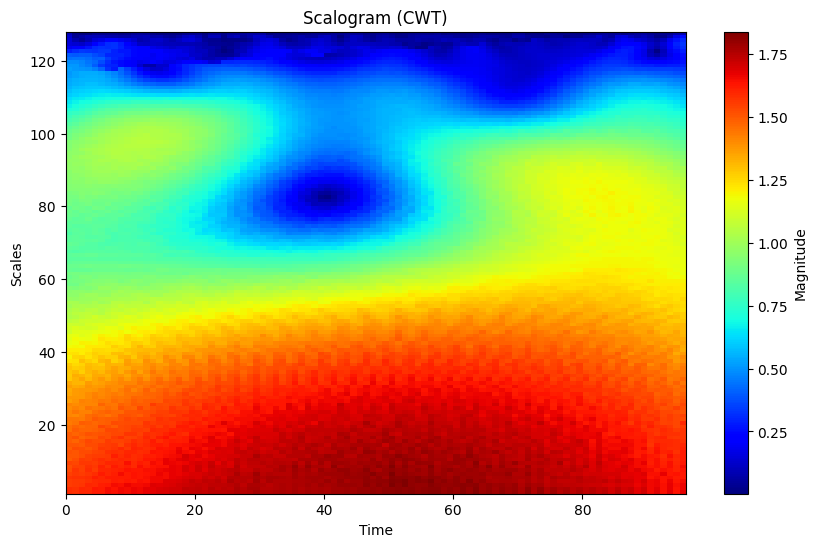

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

def generate_cwt_scalogram(signal, scales, waveletname='cmor'):
    coefficients, frequencies = pywt.cwt(signal, scales, waveletname)
    return coefficients

# Example ECG signal
signal = features_normalized_df.iloc[0].values
scales = np.arange(1, 128)
scalogram = generate_cwt_scalogram(signal, scales)

# Plot the scalogram
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(scalogram), extent=[0, len(signal), 1, 128], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Scalogram (CWT)')
plt.xlabel('Time')
plt.ylabel('Scales')
plt.show()


### **Gramian Angular Field (GAF):**
We want to convert the time series data to a two diementional image to be treated by a CNN so we used GAF which is a technique used to convert time series data into a two-dimensional image. The primary idea is to encode temporal correlations within the time series into a visual format that can be utilized by image-based machine learning models. There are two types of GAF: Gramian Angular Summation Field (GASF) and Gramian Angular Difference Field (GADF).

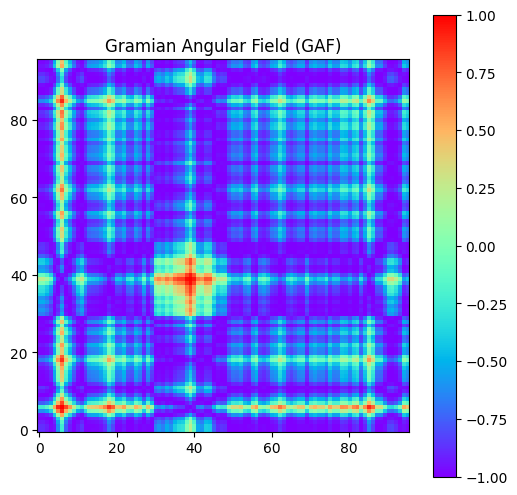

In [ ]:
from pyts.image import GramianAngularField

# Initialize GAF transformer
gaf = GramianAngularField(image_size=96, method='summation')

# Example ECG signal
signal = features_normalized_df.iloc[0].values
signal = signal.reshape(1, -1)
gaf_image = gaf.fit_transform(signal)

# Plot GAF image
plt.figure(figsize=(6, 6))
plt.imshow(gaf_image[0], cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Gramian Angular Field (GAF)')
plt.show()


### **Time-Frequency Domain Analysis:**

In [ ]:
from scipy.stats import skew, kurtosis


In [ ]:
from scipy.fftpack import fft

# Extract time domain features
def extract_time_domain_features(signal):
    return {
        'mean': np.mean(signal),
        'std': np.std(signal),
        'skew': skew(signal),
        'kurtosis': kurtosis(signal)
    }

# Extract frequency domain features
def extract_frequency_domain_features(signal):
    N = len(signal)
    T = 1.0 / 100.0  # Assume a sampling rate of 100 Hz
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    return np.abs(yf[0:N//2])

# Example ECG signal
signal = features_normalized_df.iloc[0].values
time_features = extract_time_domain_features(signal)
frequency_features = extract_frequency_domain_features(signal)

print("Time Domain Features:", time_features)
print("Frequency Domain Features:", frequency_features)


Time Domain Features: {'mean': 0.5191103736353136, 'std': 0.20537833981708692, 'skew': -0.7219119952776955, 'kurtosis': -0.4230955119584454}
Frequency Domain Features: [4.98345959e+01 7.41195039e+00 7.33273198e+00 5.16918663e+00
 2.56806965e+00 2.45925509e+00 2.13361025e+00 1.21869682e+00
 1.46856378e+00 2.05700556e+00 2.07024349e+00 2.14557588e+00
 1.93459116e+00 2.24224033e+00 1.35439618e+00 8.66849013e-01
 1.48947461e-01 8.16893422e-01 1.31583902e+00 1.83476476e-01
 1.54773850e+00 2.79822763e-01 7.95833270e-01 5.36262373e-01
 6.38520554e-01 1.02829136e+00 4.93187679e-01 7.76460579e-01
 6.85143739e-01 1.50302241e+00 5.50243326e-01 4.48381889e-01
 1.03446639e+00 4.66883270e-02 1.38995923e-01 3.63999755e-01
 4.99870044e-01 3.87138408e-01 1.38269600e-01 3.33079989e-01
 2.29406636e-01 1.94474160e-01 2.02542324e-01 3.52467620e-01
 2.44475194e-01 3.00950077e-01 1.13633500e-01 3.60443379e-02]


### **Generate GAF images for all ECG:**

In [ ]:
gaf_images = []
for signal in features_normalized_df.values:
    signal = signal.reshape(1, -1)
    gaf_image = gaf.fit_transform(signal)
    gaf_images.append(gaf_image)

# Convert gaf_images to numpy array
gaf_images = np.array(gaf_images)


### **CNN architecture definition and fitting:**

Here the CNN Parameters are obtained by trial and Error process, where we tried multiple diffrent epoch sizes and diffrent number of layers using a mutiple activation functions until we obtained the following configuration that gaved us the best results

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare labels (assuming you have a 'labels' array)
# Assuming 'labels' is a numpy array containing class labels for each ECG signal

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(gaf_images, labels_resampled , test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Move channels axis to the last dimension
X_train = np.moveaxis(X_train, 1, -1)
X_test = np.moveaxis(X_test, 1, -1)
X_val = np.moveaxis(X_val, 1, -1)

# Define CNN model architecture using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')  # Assuming num_classes is the number of output classes
])

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training dataset
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_val, y_val))

# Evaluate the trained model on the testing dataset
test_loss, test_acc = model.evaluate(X_test, y_test)

# Calculate classification metrics
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Optionally, save the trained model for future use
model.save("ecg_classification_model.h5")


Epoch 1/60
3/3 [==============================] - 1s 161ms/step - loss: 9.2603 - accuracy: 0.4205 - val_loss: 2.7557 - val_accuracy: 0.4091
Epoch 2/60
3/3 [==============================] - 0s 82ms/step - loss: 2.6695 - accuracy: 0.6932 - val_loss: 0.9622 - val_accuracy: 0.8182
Epoch 3/60
3/3 [==============================] - 0s 81ms/step - loss: 1.6501 - accuracy: 0.7273 - val_loss: 1.8074 - val_accuracy: 0.5455
Epoch 4/60
3/3 [==============================] - 0s 79ms/step - loss: 1.8364 - accuracy: 0.7273 - val_loss: 0.9226 - val_accuracy: 0.7273
Epoch 5/60
3/3 [==============================] - 0s 77ms/step - loss: 0.7272 - accuracy: 0.7614 - val_loss: 0.5420 - val_accuracy: 0.8182
Epoch 6/60
3/3 [==============================] - 0s 86ms/step - loss: 0.8902 - accuracy: 0.7841 - val_loss: 0.4492 - val_accuracy: 0.8182
Epoch 7/60
3/3 [==============================] - 0s 87ms/step - loss: 0.4810 - accuracy: 0.8636 - val_loss: 0.3578 - val_accuracy: 0.7727
Epoch 8/60
3/3 [==========

# **SVM Model: (best accuracy)**

 ### **In order to run the best model with the unseen test data, upload both train and test data files, and run all the cells bellow**

---




In [ ]:
# Load and read the data
def load_data(file_path):
    data = pd.read_csv(file_path, delim_whitespace=True, header=None)
    return data

# Specify the file path
file_path = 'ECG200_TRAIN.txt'

# Load the data
data = load_data(file_path)

In [ ]:
# Split the data into labels and features
labels = data.iloc[:, 0]
features = data.iloc[:, 1:]

In [ ]:
# Splitting the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:

# Standardize the features using z-score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


## **Parameter Tuning**

After analyzing the data, we concluded that a linear kernel would not yield good accuracy due to the absence of a linear relationship in the data. The accuracy achieved with the linear kernel was approximately 0.79. Therefore, we opted to use the **RBF** (Radial Basis Function) kernel, which resulted in a significant improvement in accuracy.

The main parameters to tune for the RBF kernel are the 𝐶 and 𝛾 parameters:

**C**: This parameter controls the trade-off between allowing misclassifications and maintaining a large margin. A smaller 𝐶 value tolerates more misclassifications, resulting in a wider margin, while a larger 𝐶 value aims to classify all training examples correctly, potentially leading to a narrower margin.

**Gamma**: This parameter determines the complexity of the decision boundary. A low 𝛾 value implies a linear-like, simple decision boundary, while a high 𝛾 value allows for a more complex, wavy decision boundary.

To find the optimal values for these parameters, we performed a grid search. This method systematically searches through a specified subset of hyperparameters and evaluates model performance to identify the best combination for our dataset.



In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM with RBF kernel
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10,20]}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:")
print(grid_search.best_params_)

# Train the SVM model with the best parameters
best_svm = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
best_svm.fit(X_train_scaled, y_train)

# Predict on the training and validation data
y_train_pred = best_svm.predict(X_train_scaled)
y_val_pred = best_svm.predict(X_val_scaled)

# Calculate and print training and validation accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training accuracy: {:.2f}".format(train_accuracy))
print("Validation accuracy: {:.2f}".format(val_accuracy))



Best parameters found:
{'C': 10, 'gamma': 0.01}
Training accuracy: 1.00
Validation accuracy: 0.85


# **Code to test the accuracy of TEST DATA:**




### Change the *path_to_test_data.txt* to the test file path

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Load the test data
# Change the path to the test file path
test_data = pd.read_csv('path_to_test_data.txt', delim_whitespace=True, header=None)


# Split the test data into labels and features
test_labels = test_data.iloc[:, 0]
test_features = test_data.iloc[:, 1:]

# Standardize the test features using the same scaler used for training data
test_features = scaler.transform(test_features)

# Predict on the test data
test_predictions = best_svm.predict(test_features)

# Calculate and print the accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Test Accuracy: {test_accuracy}')

# Print the classification report
print(classification_report(test_labels, test_predictions))


# **Conclusion**

After thorough analysis and model evaluation, we determined that the Support Vector Machine (SVM) with an RBF kernel is the best model for our dataset. Through careful hyperparameter tuning, we identified the optimal parameters, which allowed the SVM model to achieve excellent performance.

The selected SVM model demonstrated strong accuracy on both the training and validation datasets, indicating its effectiveness in capturing the underlying patterns in the data and its ability to generalize well to new, unseen data.

